# Homework 7 Template

Rixin Li & G . Besla

look for "XingzhongFan"

In [5]:
# import necessary modules
# numpy provides powerful multi-dimensional arrays to hold and manipulate data
import numpy as np
# matplotlib provides powerful functions for plotting figures
import matplotlib.pyplot as plt
# astropy provides unit system and constants for astronomical calculations
import astropy.units as u
import astropy.constants as const
# import Latex module so we can display the results with symbols
from IPython.display import Latex
%matplotlib inline

# **** import CenterOfMass to determine the COM pos/vel of M33
from CenterOfMass2 import CenterOfMass

# **** import the GalaxyMass to determine the mass of M31 for each component
from GalaxyMass import ComponentMass

MW halo Mass: 1.975 x 10^12 Msun
MW disk Mass: 0.075 x 10^12 Msun
MW bulge Mass: 0.010 x 10^12 Msun
Total MW Mass: 2.060 x 10^12 Msun
M31 halo Mass: 1.921 x 10^12 Msun
M31 disk Mass: 0.120 x 10^12 Msun
M31 bulge Mass: 0.019 x 10^12 Msun
Total M31 Mass: 2.060 x 10^12 Msun
M33 halo Mass: 0.187 x 10^12 Msun
M33 disk Mass: 0.009 x 10^12 Msun
Total M33 Mass: 0.196 x 10^12 Msun
Total Local Group Mass: 4.316 x 10^12 Msun


# M33AnalyticOrbit

In [49]:
class M33AnalyticOrbit:
    """ Calculate the analytical orbit of M33 around M31 """
    
    def __init__(self,filename): # **** add inputs
        """Initialize the class
           Inputs:
                   filename: the file will store the integraed orbit
        """

        ### get the gravitational constant (the value is 4.498502151575286e-06)
        self.G = const.G.to(u.kpc**3/u.Msun/u.Gyr**2).value
        
        ### **** store the output file name
        self.filename = filename
        
        ### get the current pos/vel of M33 
        # **** create an instance of the  CenterOfMass class for M33 
        COM_M33 = CenterOfMass('M33_000.txt',2)
        # **** store the position VECTOR of the M33 COM (.value to get rid of units)
        # For M33:
        # delta = 0.1, VolDec = 4
        COMP_M33 = COM_M33.COM_P(0.1,4)
 
        # **** store the velocity VECTOR of the M33 COM (.value to get rid of units)
        COMV_M33 = COM_M33.COM_V(COMP_M33[0],COMP_M33[1],COMP_M33[2]).value
        COMP_M33 = COMP_M33.value
 
        
        ### get the current pos/vel of M31 
        # **** create an instance of the  CenterOfMass class for M31 
        COM_M31 = CenterOfMass('M31_000.txt',2)
        # **** store the position VECTOR of the M31 COM (.value to get rid of units)
        # For M33:
        # delta = 0.1, VolDec = 2
        COMP_M31 = COM_M31.COM_P(0.1,2)

        # **** store the velocity VECTOR of the M31 COM (.value to get rid of units)
        COMV_M31 = COM_M31.COM_V(COMP_M31[0],COMP_M31[1],COMP_M31[2]).value
        COMP_M31 = COMP_M31.value
        
        
        ### store the DIFFERENCE between the vectors posM33 - posM31
        # **** create two VECTORs self.r0 and self.v0 and have them be the
        # relative position and velocity VECTORS of M33
        self.r0 = COMP_M33-COMP_M31
        self.v0 = COMV_M33-COMV_M31
        
        ### get the mass of each component in M31 
        ### disk
        # **** self.rdisk = scale length (no units) (actual in kpc)
        self.rdisk = 5 
        
        # **** self.Mdisk set with ComponentMass function. Remember to *1e12 to get the right units. Use the right ptype
        # Mass units is Msun
        self.Mdisk = ComponentMass('M31_000.txt',2)*1e12
        
        ### bulge
        # **** self.rbulge = set scale length (no units) (actual in kpc)
        self.rbulge = 1
        # **** self.Mbulge  set with ComponentMass function. Remember to *1e12 to get the right units Use the right ptype
        # Mass units is Msun
        self.Mbulge = ComponentMass('M31_000.txt',1)*1e12
 
        # Halo
        # **** self.rhalo = set scale length from HW5 (no units) (actual in kpc)
        self.rhalo = 62
        # **** self.Mhalo set with ComponentMass function. Remember to *1e12 to get the right units. Use the right ptype
        # Mass units is Msun
        self.Mhalo = ComponentMass('M31_000.txt',1)*1e12
 
    
    
    def HernquistAccel(self,M,ra,r): # it is easiest if you take as an input the position VECTOR 
        """ 
        Calculate the gravitational acceleration induced by a Hernquist profile
        Inputs:
            M: total halo or bulge mass in Msun
            ra: corresponding scale length in kpc
            r: the magnitude of the relative position vector in kpc
        Returns:
            Hernquist acceleration vector in kpc/Gyr^2
        """
        
        ### **** Store the magnitude of the position vector
        rmag = np.sqrt(r[0]**2+r[1]**2+r[2]**2)
        
        ### *** Store the Acceleration
        Hern =  -self.G * M/(rmag*(ra+rmag)**2)*r
        #follow the formula in the HW instructions
        # NOTE: we want an acceleration VECTOR so you need to make sure that in the Hernquist equation you 
        # use  -G*M/(rmag *(ra + rmag)**2) * r --> where the last r is a VECTOR 
        
        return Hern
    
    
    
    def MiyamotoNagaiAccel(self,M,rd,r):# it is easiest if you take as an input a position VECTOR  r 
        """ 
        Calculate the gravitational disk acceleration by Miyamoto-Nagai 1975 profile
        Inputs:
            M: total disk mass in Msun
            rd: scale length in kpc
            r: the magnitude of the relative position vector in kpc
        Returns:
            Miyamoto-Nagai acceleration vector in kpc/Gyr^2
        """

        
        ### Acceleration **** follow the formula in the HW instructions
        # AGAIN note that we want a VECTOR to be returned  (see Hernquist instructions)
        # this can be tricky given that the z component is different than in the x or y directions. 
        # we can deal with this by multiplying the whole thing by an extra array that accounts for the 
        # differences in the z direction:
        #  multiply the whle thing by :   np.array([1,1,ZSTUFF]) 
        # where ZSTUFF are the terms associated with the z direction
        R = np.sqrt(r[0]**2+r[1]**2)
        zd = rd/5.0
        B = rd + np.sqrt(r[2]**2+zd**2)
        acce_V = -self.G * M / (R**2+B**2)**1.5 * r
        
       
        return acce_V * np.array([1,1,B/np.sqrt(r[2]**2+zd**2)])
        # the np.array allows for a different value for the z component of the acceleration
     
    
    def M31Accel(self,r): # input should include the position vector, r
        """ 
        Sum all acceleration vectors from each galaxy component
        Input:
            r: the magnitude of the relative position vector in kpc
        Return:
            Sum acceleration vector in kpc/Gyr^2
        """

        ### Call the previous functions for the halo, bulge and disk
        # **** these functions will take as inputs variable we defined in the initialization of the class like 
        # self.rdisk etc. 
        acce_halo = self.HernquistAccel(self.Mhalo,self.rhalo,r)
        acce_bulge = self.HernquistAccel(self.Mbulge,self.rbulge,r)
        acce_disk = self.MiyamotoNagaiAccel(self.Mdisk,self.rdisk,r)
 
            # return the SUM of the output of the acceleration functions - this will return a VECTOR 
        return acce_halo+acce_bulge+acce_disk
    
    
    
    def LeapFrog(self,dt,r,v): # take as input r and v, which are VECTORS. Assume it is ONE vector at a time
        """
        Performs Leap Frog integration scheme
        Inputs:
            dt: time step in Gyr
            r: start relative position vector in kpc
            v: start relative velocity vector in kpc/Gyr
        Returns:
            new position and velocity vectors after time step dt
        """
        
        # predict the position at the next half timestep
        rhalf = rhalf = r + v*dt/2.0
        
        # predict the final velocity at the next timestep using the acceleration field at the rhalf position 
        vnew = v + self.M31Accel(rhalf)*dt
        
        # predict the final position using the average of the current velocity and the final velocity
        # this accounts for the fact that we don't know how the speed changes from the current timestep to the 
        # next, so we approximate it using the average expected speed over the time interval dt. 
        rnew = r + (v + vnew)*dt/2.0
        
        return rnew, vnew # **** return the new position and velcoity vectors
    
    
    
    def OrbitIntegration(self, t0, dt, tmax):
        """ Use LeapFrog integrator to solve the equations of motion 
         and compute the future orbit of M33 for 10 Gyr into the future
         Inputs:
             t0: starting time in Gyr
             dt: time interval in Gyr
             tmax: final time tmax in Gyr
         Returns:
             file containing predicted position and velocity vectors"""


        # initialize the time to the input starting time
        t = t0
        
        # initialize an empty array of size :  rows int(tmax/dt)+2  , columns 7
        orbit = np.zeros([int(tmax/dt)+2, 7])
        
        # initialize the first row of the orbit
        orbit[0] = t0, *tuple(self.r0), *tuple(self.v0)
        # this above is equivalent to 
        # orbit[0] = t0, self.r0[0], self.r0[1], self.r0[2], self.v0[0], self.v0[1], self.v0[2]
        
        r = self.r0
        v = self.v0
        
        # initialize a counter for the orbit.  
        i = 1 # since we already set the 0th values, we start the counter at 1
        
        # start the integration (advancing in time steps and computing LeapFrog at each step)
        while (t <= tmax): # as long as t has not exceeded the maximal time 
            
            # **** advance the time by one timestep, dt
            t = t + dt
            # **** store the new time in the first column of the ith row
            orbit[i][0] = t
            
            # ***** advance the position and velocity using the LeapFrog scheme
            # remember that LeapFrog returns a position vector and a velocity vector  
            # as an example, if a function returns three vectors you would call the function and store 
            # the variable like:     a,b,c = function(input)
            
            r, v = self.LeapFrog(dt,r,v)
         
    
            # ****  store the new position vector into the columns with indexes 1,2,3 of the ith row of orbit
            # TIP:  if you want columns 5-7 of the Nth row of an array called A, you would write : 
            # A[n, 5:8] 
            # where the syntax is row n, start at column 5 and end BEFORE column 8
            orbit[i,1:4] = r
            
            # ****  store the new position vector into the columns with indexes 1,2,3 of the ith row of orbit
            orbit[i,4:7] = v
            
            # **** update counter i , where i is keeping track of the number of rows (i.e. the number of time steps)
            i = i +1
        
        
        # write the data to a file
        np.savetxt(self.filename, orbit, fmt = "%11.3f"*7, comments='#', 
                   header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                   .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))
        
        # there is no return function

In [50]:
M33AnalyticOrbit = M33AnalyticOrbit('AnalyticOrbit_M33.txt')

In [77]:
M33Orbit = M33AnalyticOrbit.OrbitIntegration(0, 0.0001, 10)


In [78]:
M31_data = np.genfromtxt('Orbit_M31.txt',dtype=None,names=True) 
M33_data = np.genfromtxt('Orbit_M33.txt',dtype=None,names=True)
M33_new = np.genfromtxt('AnalyticOrbit_M33.txt',dtype=None,names=True)

In [79]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  
def Vector_diff(data1,data2):
    # Input:
    #     data1: input galaxy data1
    #     data2: input galaxy data2
    # Return:
    #     return the magnitude position difference and velocity difference
    x1 = data1['x']
    y1 = data1['y']
    z1 = data1['z']
    x2 = data2['x']
    y2 = data2['y']
    z2 = data2['z']
    
    vx1 = data1['vx']
    vy1 = data1['vy']
    vz1 = data1['vz']
    vx2 = data2['vx']
    vy2 = data2['vy']
    vz2 = data2['vz']
    return np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2),np.sqrt((vx1-vx2)**2+(vy1-vy2)**2+(vz1-vz2)**2)


In [80]:
# Determine the magnitude of the relative position and velocities 
Pos_M31_M33, Vel_M31_M33 = Vector_diff(M31_data,M33_data)

In [81]:
Pos_M31_M33_new = np.sqrt(M33_new['x']**2+M33_new['y']**2+M33_new['z']**2)
Vel_M31_M33_new = np.sqrt(M33_new['vx']**2+M33_new['vy']**2+M33_new['vz']**2)

Text(0.5, 1.0, '$Separation$ $Position$')

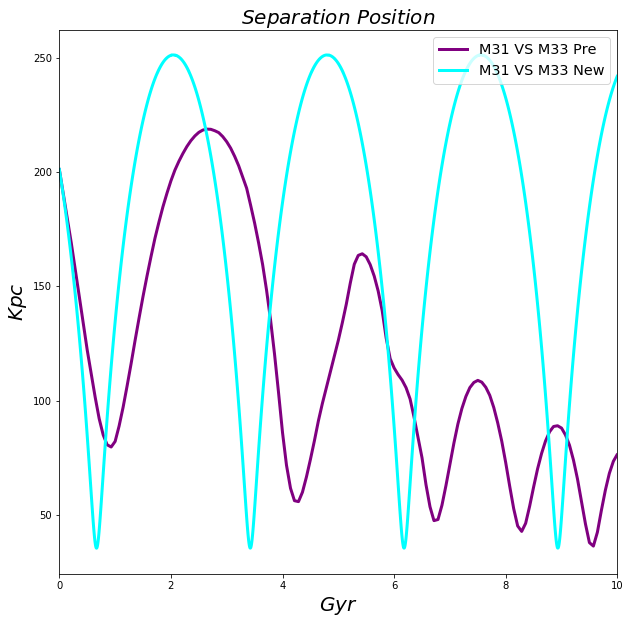

In [89]:
# Plot the Orbit of the galaxies 
#################################
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
plt.plot(M31_data['t'], Pos_M31_M33, linewidth=3, color = 'purple', label = 'M31 VS M33 Pre')
plt.plot(M33_new['t'], Pos_M31_M33_new, linewidth=3, color = 'cyan', label = 'M31 VS M33 New')

plt.xlabel('$Gyr$',fontsize=20)
plt.ylabel('$Kpc$',fontsize=20)
plt.xlim(0,10)

legend = ax.legend(loc='upper right',fontsize='x-large')
plt.title('$Separation$ $Position$',fontsize=20)


Text(0.5, 1.0, '$Relative$ $Velocity$')

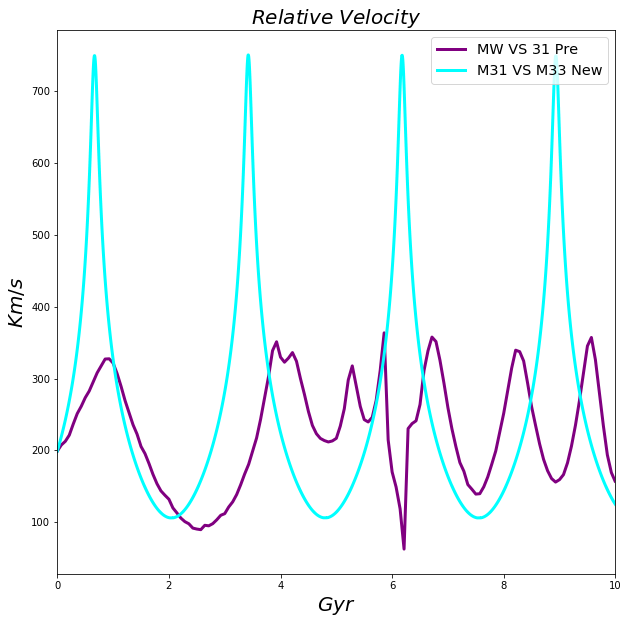

In [90]:
# Plot the orbital velocities of the galaxies 
#################################
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
plt.plot(M31_data['t'], Vel_M31_M33, linewidth=3, color = 'purple', label = 'MW VS 31 Pre')
plt.plot(M33_new['t'], Vel_M31_M33_new, linewidth=3, color = 'cyan', label = 'M31 VS M33 New')
plt.xlabel('$Gyr$',fontsize=20)
plt.ylabel('$Km/s$',fontsize=20)
legend = ax.legend(loc='upper right',fontsize='x-large')
plt.xlim(0,10)


plt.title('$Relative$ $Velocity$',fontsize=20)


## Q2
The plot are looks different
1. the position and velocity value, the max and min each cycle are shift to left a bit
2. In the new simulation the max and min seperate position and velocity are larger than previous one

## Q3

We are not count the MW's effect to M31-M33 systerm

## Q4
Use the same method add